In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
data = pd.DataFrame(digits["data"])
labels = pd.Series(digits["target"])

In [4]:
digits["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
first_image = data.iloc[0]

In [6]:
np_image = first_image.values


In [7]:
np_image

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
np_image = np_image.reshape(8,8)

In [9]:
np_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

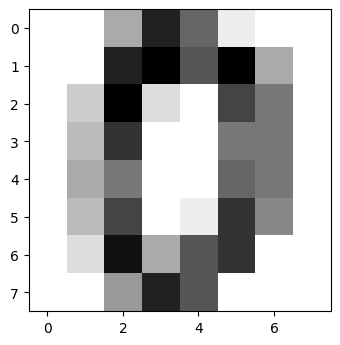

In [10]:
plt.imshow(np_image, cmap='gray_r')

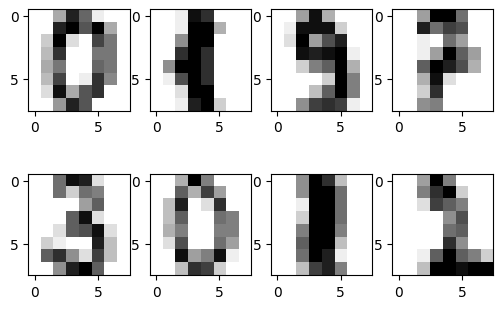

In [11]:
f, ax = plt.subplots(2, 4)

ax[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(train_features, train_labels, n_neighbors):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(train_features, train_labels)
    return model

def test(test_features, test_labels, model):
    predictions = model.predict(test_features)
    total_match = sum(test_labels == predictions)
    total_count = len(test_labels)
    return (total_match * 100) / total_count

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(train_features, train_labels, k)
        overall_accuracy = test(test_features, test_labels, model)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies


In [13]:
y = []
for k in range(1, 10):
    knn_accuracies = cross_validate(k)
    mean_acc = np.mean(knn_accuracies)
    y.append(mean_acc)
    
print(y)

[98.88728037614452, 98.21912892848304, 98.72011878247959, 98.33073496659243, 98.4977728285078, 98.27517941103687, 98.44221727295223, 98.05270972531551, 98.27567433803513]


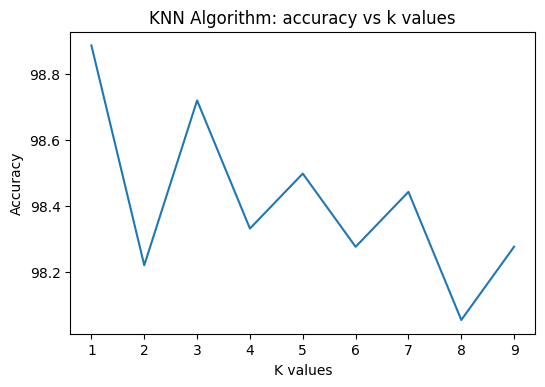

In [14]:
plt.plot(range(1, 10), y)
plt.title("KNN Algorithm: accuracy vs k values")
plt.ylabel("Accuracy")
plt.xlabel("K values")
plt.show()


In [15]:
# train using Neural Networks
from sklearn.neural_network import MLPClassifier

def train(train_features, train_labels, hidden_layer_sizes):
    model = MLPClassifier(hidden_layer_sizes = (hidden_layer_sizes, ), random_state = 1)
    model.fit(train_features, train_labels)
    return model

def test(test_features, test_labels, model):
    predictions = model.predict(test_features)
    total_match = sum(test_labels == predictions)
    total_count = len(test_labels)
    return (total_match * 100) / total_count

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(train_features, train_labels, k)
        overall_accuracy = test(test_features, test_labels, model)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies


In [16]:
y = []
for n in [8, 16, 32, 64, 128, 256]:
    accuracies = cross_validate(n)
    mean_acc = np.mean(accuracies)
    y.append(mean_acc)
    
print(y)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

[82.08092056421677, 95.15924276169265, 95.99393714427121, 96.71727295223954, 97.1628309824301, 97.7746844840386]


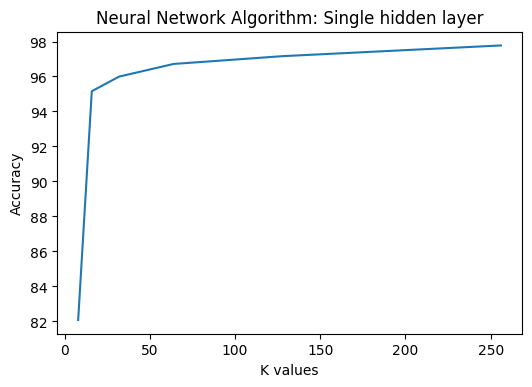

In [17]:
plt.plot([8, 16, 32, 64, 128, 256], y)
plt.title("Neural Network Algorithm: Single hidden layer")
plt.ylabel("Accuracy")
plt.xlabel("K values")
plt.show()


In [18]:
print(y)

[82.08092056421677, 95.15924276169265, 95.99393714427121, 96.71727295223954, 97.1628309824301, 97.7746844840386]


In [19]:
# Max accuracy with 256 neurons and single layer = 97.77%
# still KNN out performs the Neural network - 98.88% vs 97.77%

In [20]:
# Let us try Neural Network algorithm with 2 hidden layers
# train using Neural Networks
from sklearn.neural_network import MLPClassifier

def train(train_features, train_labels, hidden_layer_sizes):
    model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, random_state = 1)
    model.fit(train_features, train_labels)
    return model

def test(test_features, test_labels, model):
    predictions = model.predict(test_features)
    total_match = sum(test_labels == predictions)
    total_count = len(test_labels)
    return (total_match * 100) / total_count

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(train_features, train_labels, k)
        overall_accuracy = test(test_features, test_labels, model)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies


In [21]:
accuracy = cross_validate((64, 64))
mean_acc = np.mean(accuracy)
print(mean_acc)


97.05122494432071


In [22]:
# Test using three hidden layers
# Let us try Neural Network algorithm with 3 hidden layers
# train using Neural Networks
# increase the k fold validation to 6

from sklearn.neural_network import MLPClassifier

def train(train_features, train_labels, hidden_layer_sizes):
    model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, random_state = 1)
    model.fit(train_features, train_labels)
    return model

def test(test_features, test_labels, model):
    predictions = model.predict(test_features)
    total_match = sum(test_labels == predictions)
    total_count = len(test_labels)
    return (total_match * 100) / total_count

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(train_features, train_labels, k)
        overall_accuracy = test(test_features, test_labels, model)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies


In [23]:
hidden_layers = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
] 
y = []
for n in hidden_layers:
    accuracies = cross_validate(n)
    mean_acc = np.mean(accuracies)
    y.append(mean_acc)
    
print(y)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

[94.26904496469713, 97.49684132292828, 97.66350798959495]


### Summary
- KNN with K = 1 had the highest accuracy of 98.88

- Mean accuracy for Neural Network with 1 hidden layers
    - [82.08, 95.15, 95.99, 96.71, 97.16, 97.77]
    
- Mean accuracy for Neural Network with 2 hidden layers
    - 97.05
    
- Mean accuracy for Neural Network with 3 hidden layers
    - [94.26, 97.49, 97.66]
    